In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format='svg'
plt.rcParams.update({"text.usetex": False})
import seaborn as sns
sns.set_theme(style="whitegrid")
import ipywidgets as widgets 

np.random.seed(2024)

In [2]:
def test_1(sample, population):
    bar_x = sample.mean
    mu_0 = population.mean
    sigma = population.std
    n = sample.size
    return (bar_x - mu_0) / (sigma / np.sqrt(n))

In [3]:
from tests import *

example_test_dict = {
    "Test_1" : test_1,
}

Carry out test Test_1...
p-value = 0.8377
Samples are likely drawn from the original distribution. FAIL TO REJECT H0
Statistically insiginificant...


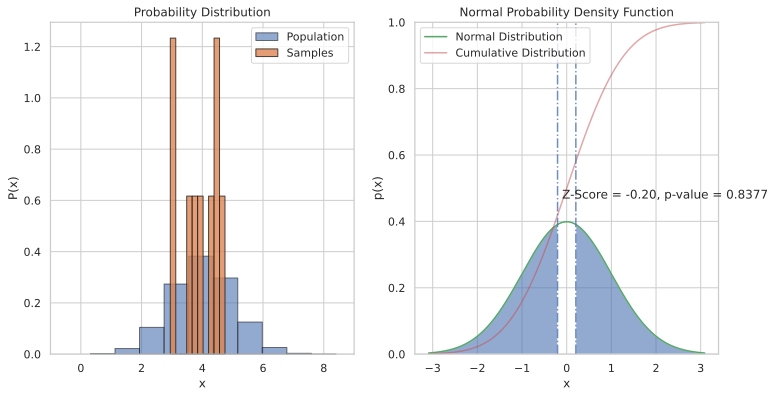

In [4]:
population_mean = 4.0
population_std = 1.0
population_size = 50000
population_dist = np.random.normal(population_mean, population_std, population_size)
population = Population(population_mean, population_std)

sample_size = 9
sample = np.random.normal(population_mean, population_std, sample_size)

display_center = population_mean
display_marginal = population_std * 5
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(population_dist, edgecolor='k', alpha=0.6, label="Population", density=True)
ax1.hist(sample, edgecolor='k', alpha=0.8, label="Samples", density=True)
ax1.legend()
ax1.set_title("Probability Distribution")
ax1.set_xlabel('x')
ax1.set_ylabel("P(x)")
ax1.set_xlim(display_center - display_marginal, display_center + display_marginal)

samples = [sample]
populations = [population]

test_statistic = Test_Statistic()
test_statistic.sample_push(samples)
test_statistic.population_push(populations)

z_test = Hypothesis_Test(test_type="Z-Test")
z_test.xx_test(test_statistic, test_dict=example_test_dict, test_name="Test_1")
z_test.plot_hypothesis_test(ax2)

test_statistic.test_statistic_clear()